# Import

In [63]:
from imports import *

# 1

In [64]:
df=data('tips')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


## a

In [66]:
df['price_per_person'] = df.total_bill/df['size']


In [67]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


## b

Top 2 feature guesses:

1) total_bill
2) price_per_person

## c

In [68]:
dummy_list=[
	'sex',
	'smoker',
	'day',
	'time'
]

In [69]:
dummy_df=pd.get_dummies(df[dummy_list], dummy_na=False, drop_first=True)

In [70]:
df=pd.concat([df, dummy_df], axis=1)

In [71]:
df=df.drop(dummy_list,axis=1)

In [72]:
columns_to_scale = ['total_bill','price_per_person','tip']

In [73]:
scaler = MinMaxScaler()

In [74]:
scaler.fit(df[columns_to_scale])

MinMaxScaler()

In [75]:
# munging 😬
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

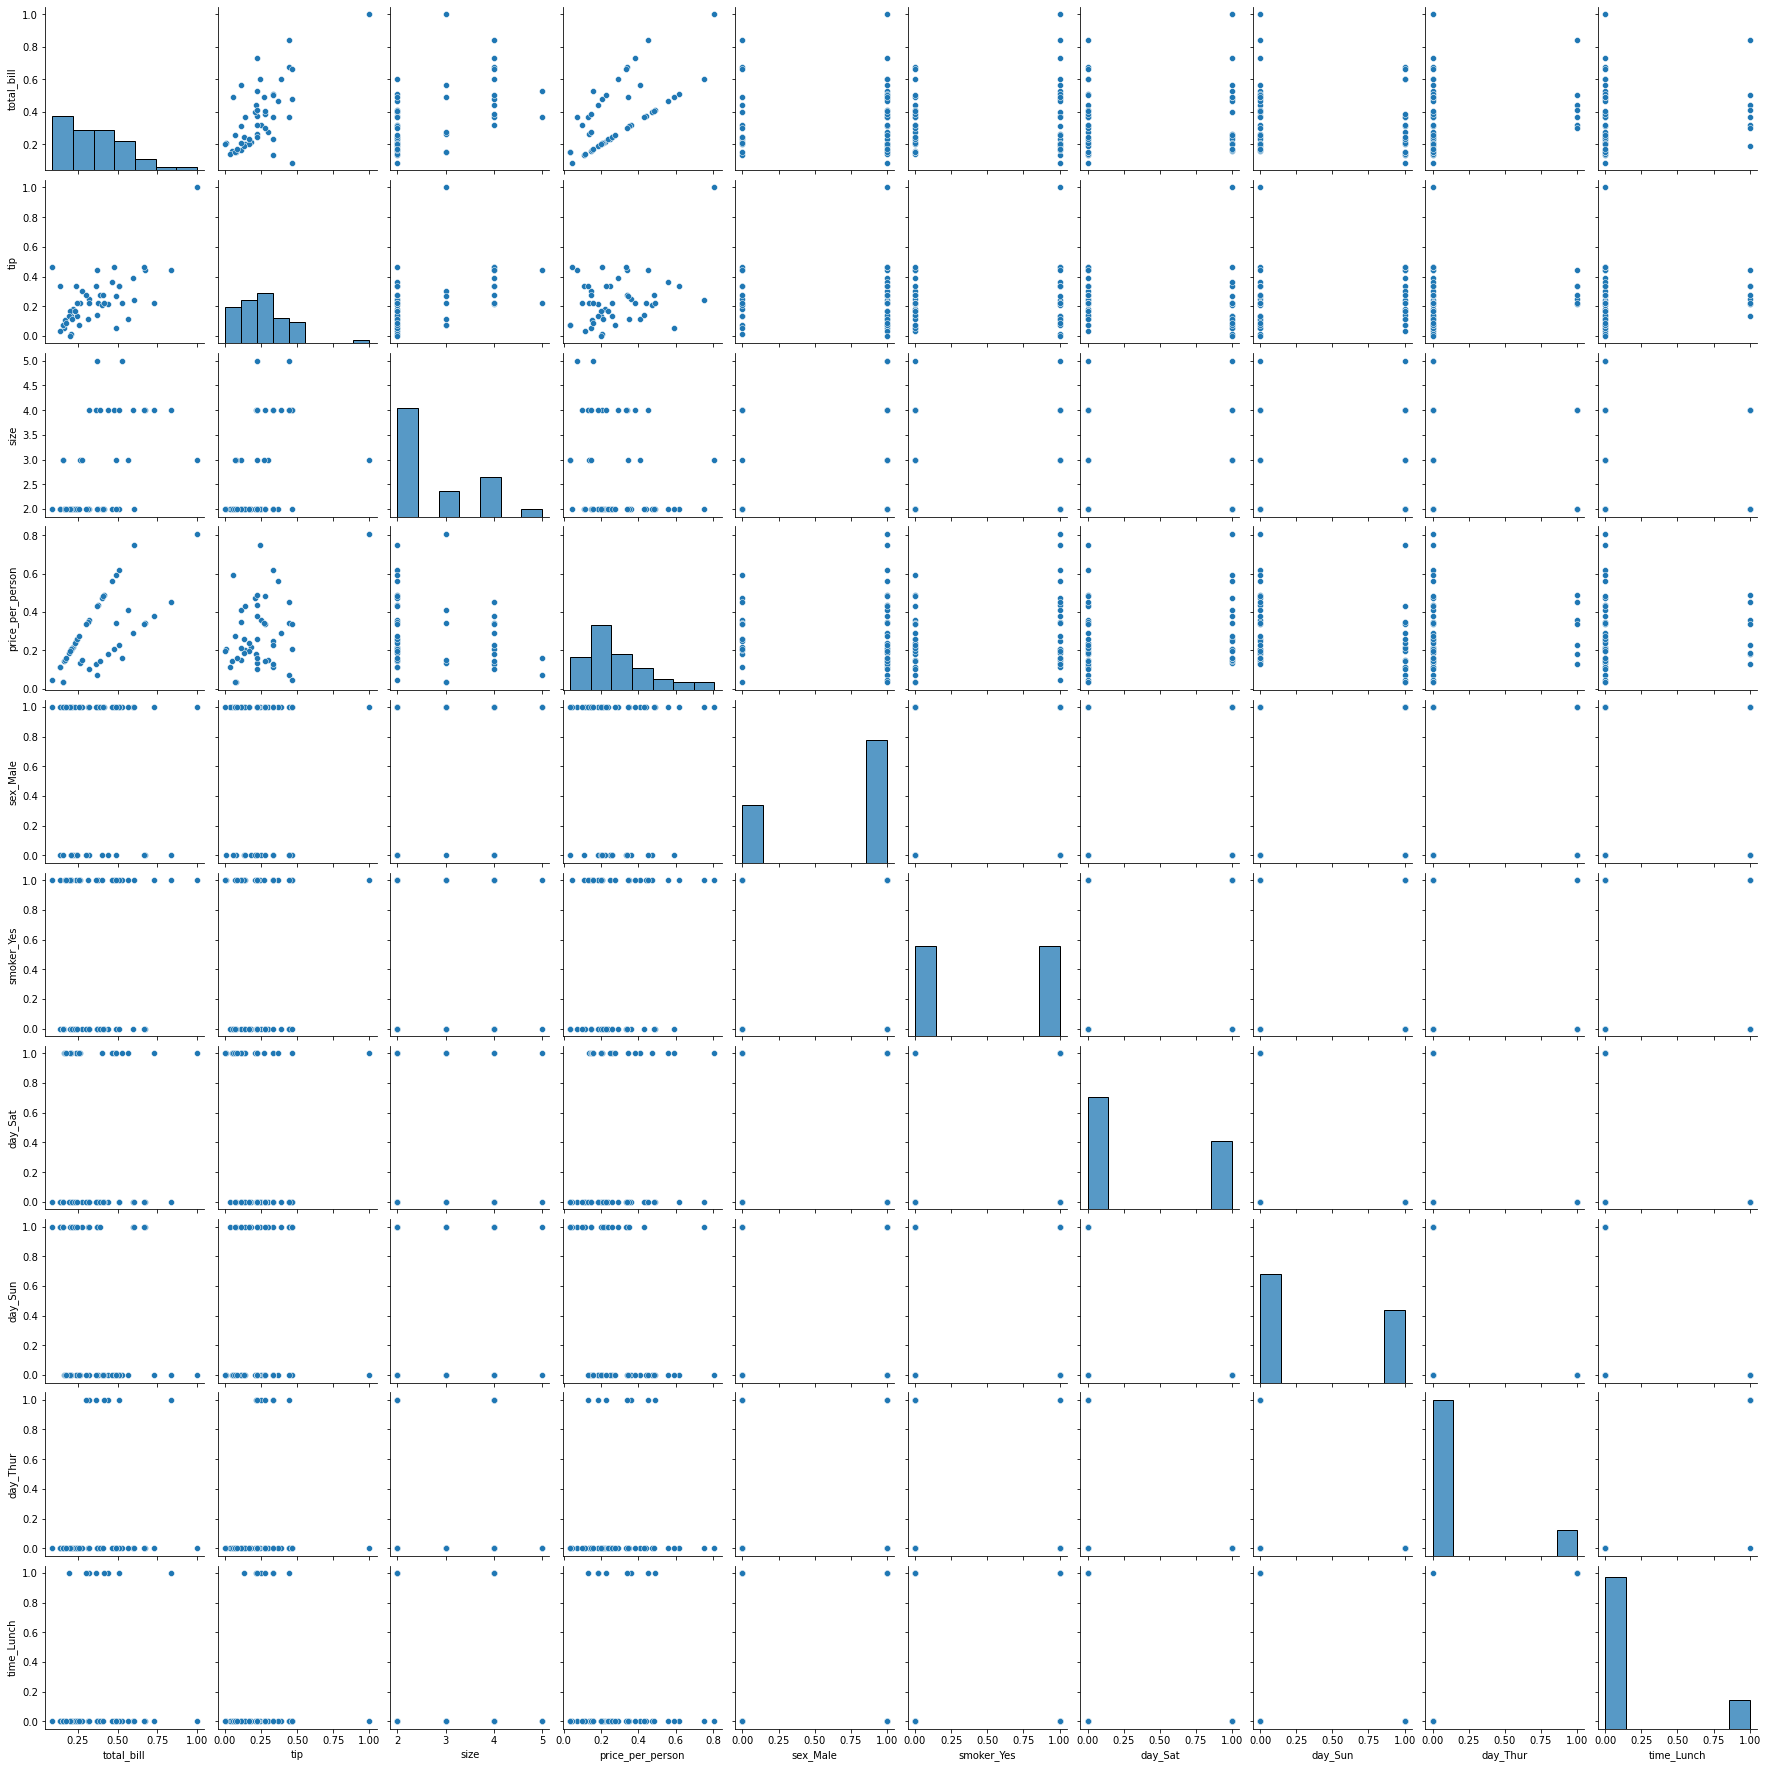

In [76]:
sns.pairplot(df.sample(50))

In [77]:
df.head()

,total_bill,tip,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,0.291579,0.001111,2,0.322989,0,0,0,1,0,0
2,0.152283,0.073333,3,0.032854,1,0,0,1,0,0
3,0.375786,0.277778,3,0.237261,1,0,0,1,0,0
4,0.431713,0.256667,2,0.515230,1,0,0,1,0,0
5,0.450775,0.290000,4,0.188075,0,0,0,1,0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   size              244 non-null    int64  
 3   price_per_person  244 non-null    float64
 4   sex_Male          244 non-null    uint8  
 5   smoker_Yes        244 non-null    uint8  
 6   day_Sat           244 non-null    uint8  
 7   day_Sun           244 non-null    uint8  
 8   day_Thur          244 non-null    uint8  
 9   time_Lunch        244 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 11.0 KB


In [79]:
y_train=df.tip
X_train=df.drop('tip',axis=1)

In [80]:
# Like our other sklearn objects...
kbest = SelectKBest(f_regression, k=2)
kbest.fit(X_train, y_train)

SelectKBest(k=3, score_func=<function f_regression at 0x7fcdb0d470d0>)

In [81]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[kbest.get_support()]
)
X_train_transformed.head()

,total_bill,size,price_per_person
1,0.291579,2.0,0.322989
2,0.152283,3.0,0.032854
3,0.375786,3.0,0.237261
4,0.431713,2.0,0.515230
5,0.450775,4.0,0.188075


## d 

In [82]:
lm = LinearRegression()

In [83]:
rfe = RFE(lm, n_features_to_select=2)

In [84]:
# Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  


In [85]:
X_train_transformed = pd.DataFrame(
    rfe.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[rfe.support_]
)
X_train_transformed.head()

,total_bill,price_per_person,day_Sat
1,0.291579,0.322989,0.0
2,0.152283,0.032854,0.0
3,0.375786,0.237261,0.0
4,0.431713,0.515230,0.0
5,0.450775,0.188075,0.0


## e

Why do you think select k best and recursive feature elimination might give different answers for the top features?
- because k best doesnt take into account how the new feature interacts with the first [0:-1] features.

Does this change as you change the number of features your are selecting?
- yes, k=3 and n=3 for k-best and recursive, respectively had two features the same but k selected size and n selected is_sat as the third features, respectively.